In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from dataset import Dataset
from folder import Folder
from constants import channels, fs

In [4]:
dataset = Dataset('saved_data.pickle', is_loaded=True)
dataset.sumarize_basic_stats(False)

In [3]:
del dataset

In [4]:
dataset.sumarize_basic_stats(False)
channels_sep = dict()
for i, drug in enumerate(dataset.drugs):
    print(f"\r{i  + 1} / {len(dataset.drugs)} - computing {drug}                   ", end='')
    channels_sep[drug] = dataset.get_average_spectrums(drug=drug, time='T2', visualize=False)
print()

11 / 11 - computing MDMA                       


(76800,)
['CBD', 'MDMA', 'MXP', 'saline', 'cocaine', 'sal fyz', 'heroin', 'sal canab', 'MDPV', 'HHC', 'psilo']
81


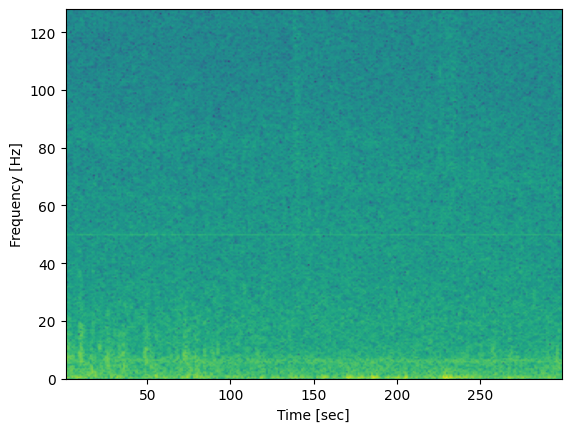

In [10]:
from scipy.signal import spectrogram
sig = dataset.select(drug='psilo', time='T3')[3]['F1']
f, t, Sxx = spectrogram(sig, fs, nperseg=512, noverlap=256)

print(sig.shape)
print(dataset.drugs)
print(np.where(f > 40)[0][0])

plt.pcolormesh(t, f, 20*np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

MDMA (72, 98, 299)


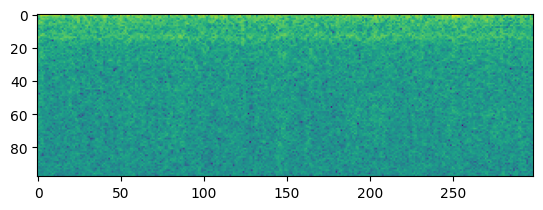

In [98]:
label, specs = dataset.get_spectrograms_train(np.random.randint(low=0, high=len(dataset)))
print(label, specs.shape)
plt.imshow(np.log(specs[25, ...] + 1e-12))
plt.show()

In [5]:
spectral_dist = dict()
x1 = np.array(channels_sep['psilo'][0])
for i, d1 in enumerate(dataset.drugs):
    for j, d2 in enumerate(dataset.drugs):
        if j < i: continue
        spectral_dist[(d1, d2)] = 0
        for k in range(len(channels)):
            spectral_dist[(d1, d2)] += np.linalg.norm(np.mean(channels_sep[d1][k], axis=0) - np.mean(channels_sep[d2][k], axis=0), ord=2)

sd_mat = np.zeros((18, 18))
for i in range(18):
    for j in range(18):
        sd_mat[i, j] = spectral_dist[(dataset.drugs[i], dataset.drugs[j])]
sd_mat += sd_mat.T


ValueError: Improper number of dimensions to norm.

In [ ]:
del dataset